In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# dosages - effectiveness

df = pd.DataFrame({'x':[0.2, 0.5, 1], 'y':[0, 1, 0]})

In [18]:
df

,x,y
0,0.2,0
1,0.5,1
2,1.0,0


<Axes: xlabel='x', ylabel='y'>

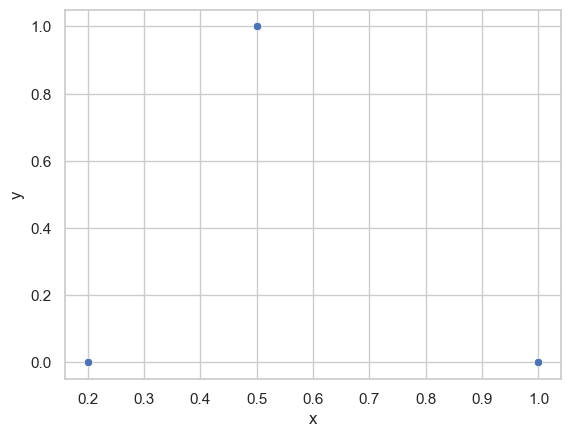

In [19]:
sns.scatterplot(x='x', y='y', data=df)

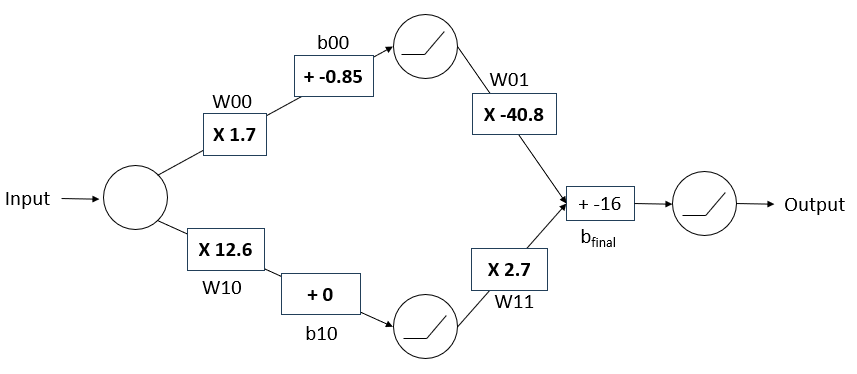

In [24]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16), requires_grad=False)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu + scaled_bottom_relu + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

In [25]:
inputs = torch.linspace(start=0, end=1, steps=11)

In [26]:
inputs

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [27]:
model = BasicNN()

In [28]:
outputs = model(inputs)

In [29]:
sns.set(style='whitegrid')

Text(0, 0.5, 'Effectiveness')

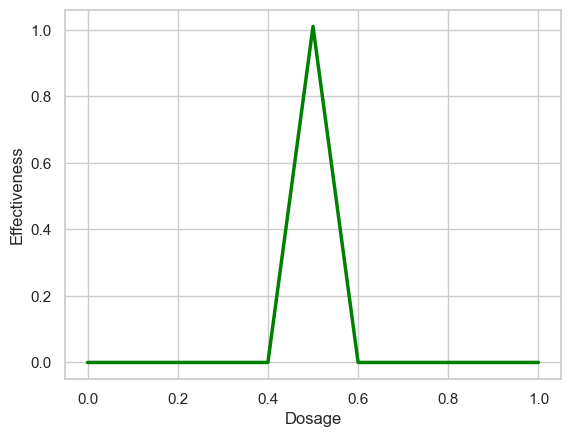

In [31]:
sns.lineplot(x=inputs, y=outputs, color='green', linewidth=2.5)
plt.xlabel('Dosage')
plt.ylabel('Effectiveness')

In [34]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu + scaled_bottom_relu + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

In [35]:
model = BasicNN_train()

In [36]:
outputs = model(inputs)

Text(0, 0.5, 'Effectiveness')

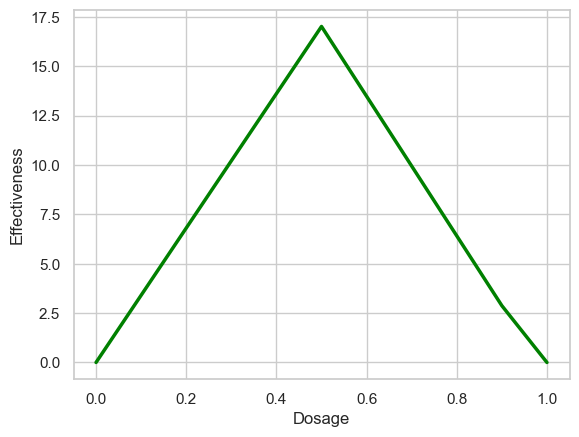

In [38]:
sns.lineplot(x=inputs, y=outputs.detach(), color='green', linewidth=2.5)
plt.xlabel('Dosage')
plt.ylabel('Effectiveness')

In [40]:
from torch.optim import SGD
optimizer = SGD(model.parameters(), lr=0.1)

In [41]:
inputs = df.x.values
labels = df.y.values

In [42]:
for epoch in range(100):
    total_loss = 0
    
    for i in range(len(inputs)):
        input_i = inputs[i]
        label_i = labels[i]
        
        output_i = model(input_i)
        
        loss = (output_i - label_i)**2
        
        loss.backward()
        
        total_loss += float(loss)
        
        if total_loss < 0.0001:
            print('Num of Steps:', epoch)
            
        optimizer.step()
        optimizer.zero_grad()
        
        print(f"Step: {epoch} Final Bias: {model.final_bias.data} \n")

Step: 0 Final Bias: -1.3608001470565796 

Step: 0 Final Bias: -4.290640354156494 

Step: 0 Final Bias: -4.290640354156494 

Step: 1 Final Bias: -4.7933125495910645 

Step: 1 Final Bias: -7.03665018081665 

Step: 1 Final Bias: -7.03665018081665 

Num of Steps: 2
Step: 2 Final Bias: -7.03665018081665 

Step: 2 Final Bias: -8.831319808959961 

Step: 2 Final Bias: -8.831319808959961 

Num of Steps: 3
Step: 3 Final Bias: -8.831319808959961 

Step: 3 Final Bias: -10.26705551147461 

Step: 3 Final Bias: -10.26705551147461 

Num of Steps: 4
Step: 4 Final Bias: -10.26705551147461 

Step: 4 Final Bias: -11.415644645690918 

Step: 4 Final Bias: -11.415644645690918 

Num of Steps: 5
Step: 5 Final Bias: -11.415644645690918 

Step: 5 Final Bias: -12.334515571594238 

Step: 5 Final Bias: -12.334515571594238 

Num of Steps: 6
Step: 6 Final Bias: -12.334515571594238 

Step: 6 Final Bias: -13.069612503051758 

Step: 6 Final Bias: -13.069612503051758 

Num of Steps: 7
Step: 7 Final Bias: -13.069612503051